In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv


In [3]:
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

#misc libraries
import random
import time
import datetime


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) 
[GCC 9.4.0]
pandas version: 1.3.5
matplotlib version: 3.5.3
NumPy version: 1.21.6
SciPy version: 1.7.3
IPython version: 7.33.0
-------------------------


In [4]:
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from pylab import rcParams
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn import tree

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(style = 'whitegrid', palette = 'muted', font_scale = 1.2)
HAPPY_COLORS_PALETTE = ['#01BEFE', '#FFDD00', '#FF7D00', '#FF006D', '#ADFF02', '#8F00FF']
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12 ,8

In [5]:
def parser(x):
    return datetime.datetime.fromtimestamp(int(x))

In [6]:
data=pd.read_csv('./data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [7]:
data.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Fuction to calculate the missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_data1 = missing_values_table(data)
print(missing_values_data1.head(30))

Your selected dataframe has 7 columns.
There are 7 columns that have missing values.
                   Missing Values  % of Total Values
Open                      1243608               25.6
High                      1243608               25.6
Low                       1243608               25.6
Close                     1243608               25.6
Volume_(BTC)              1243608               25.6
Volume_(Currency)         1243608               25.6
Weighted_Price            1243608               25.6


In [9]:
data=data.interpolate()

In [10]:
data.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.555046,2.436653,4.39
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.654511,2.873305,4.39
2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.753977,3.309958,4.39
2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.853442,3.746611,4.39


## 1. 标准化处理
避免大尺度的数据影响过大

In [13]:
data=(data-data.mean())/data.std()

<AxesSubplot:xlabel='Timestamp'>

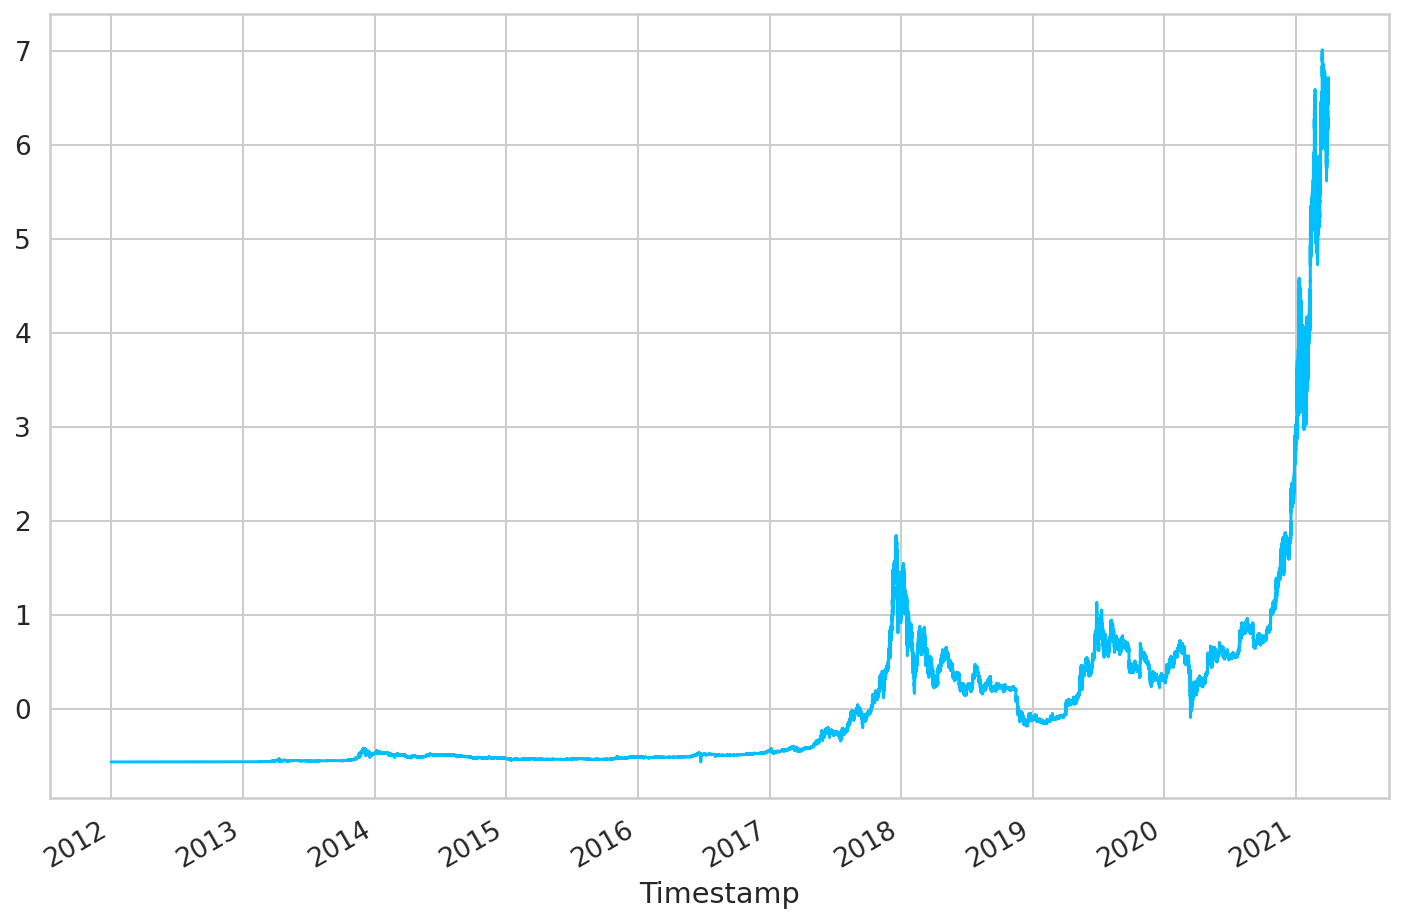

In [14]:
data['Close'].plot()

In [19]:
onedata=np.array(data['Close'])
price=[]
for index in range(len(onedata)-30):
    price.append(onedata[index:index+30])

In [23]:
price=np.array(price)
price.shape

(4857347, 30)

In [71]:
train1=price[:,:,np.newaxis]
x1_train=train1[:,:-1]
y1_train=train1[:,-1]

## 2. 时间序列预测

In [72]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.utils.vis_utils import plot_model

print("keras: {}". format(keras.__version__))

keras: 2.6.0


In [73]:
model1=Sequential()
model1.add(LSTM(32,input_shape=(29,1),return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(16,return_sequences=False))
model1.add(Dropout(0.2))
model1.add(Dense(1))
model1.add(Activation('linear'))
model1.compile(loss='mse',optimizer='rmsprop')

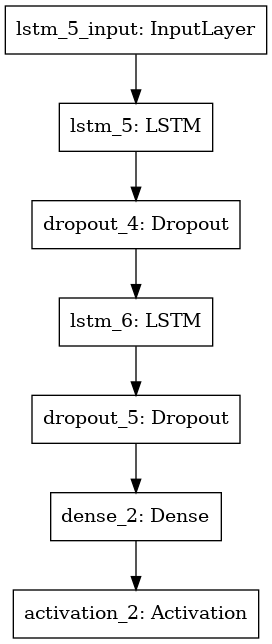

In [74]:
plot_model(model1)

In [ ]:
# 先尝试一下，获得一个大致速度的估计
model1.fit(x1_train,y1_train,batch_size=1024,epochs=1)

In [76]:
# 然后进行精细化训练
model1.fit(x1_train,y1_train,batch_size=1024,epochs=1)

(4857347, 29, 1)

## 3. 数据划分

In [80]:
from sklearn.model_selection import train_test_split
import sklearn
print('sklearn: version {}'.format(sklearn.__version__))

sklearn: version 1.0.2


In [81]:
x2_train, x2_test, y2_train, t2_test=train_test_split(x1_train,y1_train,test_size=0.1)

In [85]:
model2=Sequential()
model2.add(LSTM(32,input_shape=(29,1),return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(16,return_sequences=False))
model2.add(Dropout(0.2))
model2.add(Dense(1))
model2.add(Activation('linear'))
model2.compile(loss='mse',optimizer='rmsprop')

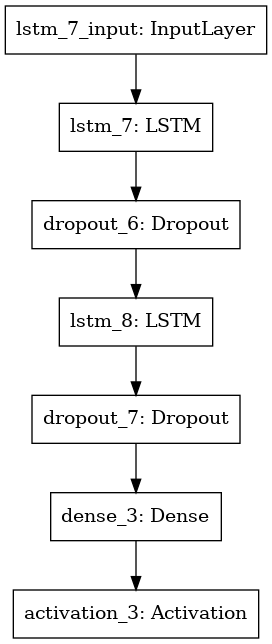

In [86]:
plot_model(model2)

In [ ]:
model2.fit(x2_train,y2_train,batch_size=2048,epochs=10)

Epoch 1/10
2135/2135 [==============================] - 819s 380ms/step - loss: 0.0242
Epoch 2/10
2135/2135 [==============================] - 798s 374ms/step - loss: 0.0167
Epoch 3/10
2135/2135 [==============================] - 798s 374ms/step - loss: 0.0164
Epoch 4/10
2135/2135 [==============================] - 830s 389ms/step - loss: 0.0164
Epoch 5/10
2135/2135 [==============================] - 803s 376ms/step - loss: 0.0162
Epoch 6/10
1185/2135 [===============>..............] - ETA: 5:55 - loss: 0.0162

## 4. 模型保存

In [ ]:
from keras.models import load_model

model2.save('model2.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('model2.h5')